In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline

# Opgave 1.4

In [3]:
class Dice(object):
     
    def __init__():
        pass
    
    @staticmethod
    def outcome_space():
        
        return [i + 1 for i in range(6)]

  

In [4]:
t1, t2, t3 = Dice.outcome_space(), Dice.outcome_space(), Dice.outcome_space() 

In [5]:
outcomes = list()

for i in t1:
    for j in t2:
        for k in t2:
            outcomes.append(i+j+k)


### Distribution of outcomes

(array([  1.,   0.,   3.,   0.,   6.,   0.,  10.,   0.,  15.,   0.,  21.,
          0.,  25.,   0.,  27.,   0.,  27.,   0.,  25.,   0.,  21.,   0.,
         15.,   0.,  10.,   0.,   6.,   0.,   3.,   0.,   1.]),
 array([  3. ,   3.5,   4. ,   4.5,   5. ,   5.5,   6. ,   6.5,   7. ,
          7.5,   8. ,   8.5,   9. ,   9.5,  10. ,  10.5,  11. ,  11.5,
         12. ,  12.5,  13. ,  13.5,  14. ,  14.5,  15. ,  15.5,  16. ,
         16.5,  17. ,  17.5,  18. ,  18.5]),
 <a list of 31 Patch objects>)

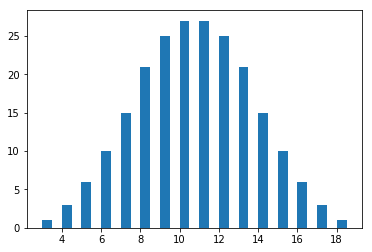

In [6]:
bins = [i*0.5 + 3 for i in range(16*2)]
plt.hist(outcomes, bins=bins)

In [7]:
def number_of_tens(x):
    if x == 10:
        return 1
    else:
        return 0

In [8]:
gunstige_udfald = np.sum([number_of_tens(outcome) for outcome in outcomes ])
print('antal gunstige udfald er:',gunstige_udfald)

antal gunstige udfald er: 27


# Opgave 1.24

Vi laver en nem kodning: (1,1) = 11, (2,1) = 21 osv.

In [9]:
def gen_set(t1,t2):
    return int(str(t1) + str(t2))

def read_set(s):
    t1, t2 = int(str(s)[0]),int(str(s)[1])
    return t1, t2

In [10]:
A = set(['41','42','43','44','45','46'])
B = set(['11','21','31','41','51','61'])
C = set(['41','42','43','44','14','24','34'])
D = set(['14','23','32','41'])
F = set(['16','61','25','52','34','43'])

In [11]:
def get_intersection(set1, set2):
    
    return set1.intersection(set2)

def elements_in_intersection(set1, set2):
    
    intersection = get_intersection(set1, set2)
    return len(intersection)

def get_intersection_probability(set1, set2):
    
    intersection = get_intersection(set1, set2)
    return len(intersection)/36

def get_probability(set1, set2):
    
    nr_elements1 = len(set1)
    nr_elements2 = len(set2)
    
    return nr_elements1*nr_elements2/(36*36)

In [12]:
all_sets = [A, B, C, D, F]
set_names =  ['A', 'B', 'C', 'D', 'F']

results = {'set':set_names}
for i in range(len(all_sets)):
    results[set_names[i]] = [elements_in_intersection(all_sets[i],j) for j in all_sets]
    

In [13]:
# puts everything to dataframe for printing
df = pd.DataFrame(results)

In [14]:
df

,A,B,C,D,F,set
0,6,1,4,1,1,A
1,1,6,1,1,1,B
2,4,1,7,2,2,C
3,1,1,2,4,0,D
4,1,1,2,0,6,F


Til Latex output:

In [15]:
print(df.to_latex(index=False))

\begin{tabular}{rrrrrl}
\toprule
 A &  B &  C &  D &  F & set \\
\midrule
 6 &  1 &  4 &  1 &  1 &   A \\
 1 &  6 &  1 &  1 &  1 &   B \\
 4 &  1 &  7 &  2 &  2 &   C \\
 1 &  1 &  2 &  4 &  0 &   D \\
 1 &  1 &  2 &  0 &  6 &   F \\
\bottomrule
\end{tabular}



### Calculating intersections probabilities

In [16]:
results = {'set':set_names}
for i in range(len(all_sets)):
    results[set_names[i]] = [get_intersection_probability(all_sets[i],j) for j in all_sets]

In [17]:
df = pd.DataFrame(results)
df.round(3)

,A,B,C,D,F,set
0,0.167,0.028,0.111,0.028,0.028,A
1,0.028,0.167,0.028,0.028,0.028,B
2,0.111,0.028,0.194,0.056,0.056,C
3,0.028,0.028,0.056,0.111,0.000,D
4,0.028,0.028,0.056,0.000,0.167,F


Til Latex output:

In [18]:
print(df.round(3).to_latex(index=False))

\begin{tabular}{rrrrrl}
\toprule
     A &      B &      C &      D &      F & set \\
\midrule
 0.167 &  0.028 &  0.111 &  0.028 &  0.028 &   A \\
 0.028 &  0.167 &  0.028 &  0.028 &  0.028 &   B \\
 0.111 &  0.028 &  0.194 &  0.056 &  0.056 &   C \\
 0.028 &  0.028 &  0.056 &  0.111 &  0.000 &   D \\
 0.028 &  0.028 &  0.056 &  0.000 &  0.167 &   F \\
\bottomrule
\end{tabular}



### Calculating P(A)P(B)

In [19]:
results = {'set':set_names}
for i in range(len(all_sets)):
    results[set_names[i]] = [get_probability(all_sets[i],j) for j in all_sets]

In [20]:
# puts everything to dataframe for printing
df = pd.DataFrame(results)
df.round(3)

,A,B,C,D,F,set
0,0.028,0.028,0.032,0.019,0.028,A
1,0.028,0.028,0.032,0.019,0.028,B
2,0.032,0.032,0.038,0.022,0.032,C
3,0.019,0.019,0.022,0.012,0.019,D
4,0.028,0.028,0.032,0.019,0.028,F


Til Latex output:

In [21]:
print(df.round(3).to_latex(index=False))

\begin{tabular}{rrrrrl}
\toprule
     A &      B &      C &      D &      F & set \\
\midrule
 0.028 &  0.028 &  0.032 &  0.019 &  0.028 &   A \\
 0.028 &  0.028 &  0.032 &  0.019 &  0.028 &   B \\
 0.032 &  0.032 &  0.038 &  0.022 &  0.032 &   C \\
 0.019 &  0.019 &  0.022 &  0.012 &  0.019 &   D \\
 0.028 &  0.028 &  0.032 &  0.019 &  0.028 &   F \\
\bottomrule
\end{tabular}



# Opgave 1.9

In [22]:
def prob_func(x):
    
    return (52-x-16)/(52-x)

In [23]:
prob = 1
for i in range(13):
    #print(i, prob_func(i))
    prob = prob * prob_func(i)

In [24]:
prob

0.0036389610348723633